In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [2]:
url='https://drive.google.com/file/d/1GuosYDgfE-SrmfBao53O-iaVUYov0THG/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head(10)

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.0,0.802982,2.0,0.766127,13,6,2,0,0,1
1,2600.0,0.121876,1.0,0.957151,4,0,0,0,0,0
2,3042.0,0.085113,0.0,0.658180,2,0,1,0,1,0
3,3300.0,0.036050,0.0,0.233810,5,0,0,0,0,0
4,63588.0,0.024926,0.0,0.907239,7,1,1,0,0,0
5,3500.0,0.375607,1.0,0.213179,3,1,0,0,0,0
6,NaN,5710.000000,0.0,0.305682,8,3,0,0,0,0
7,3500.0,0.209940,0.0,0.754464,8,0,0,0,0,0
8,NaN,46.000000,NaN,0.116951,2,0,0,0,0,0
9,23684.0,0.606291,2.0,0.189169,9,4,0,0,0,0


In [3]:
df[df["monthly_income"].isin(["null","nan","Null","Nan","NaN",np.nan])][["monthly_income","debt_ratio"]]

,monthly_income,debt_ratio
6,NaN,5710.0
8,NaN,46.0
16,NaN,2058.0
32,NaN,977.0
41,NaN,75.0
...,...,...
149976,NaN,60.0
149977,NaN,349.0
149984,NaN,25.0
149992,NaN,4132.0


In [4]:
df.shape

(150000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   monthly_income                    120269 non-null  float64
 1   debt_ratio                        150000 non-null  float64
 2   nr_dependents                     146076 non-null  float64
 3   credit_balances_dividedby_limits  150000 non-null  float64
 4   nr_open_credit_lines_and_loans    150000 non-null  int64  
 5   nr_real_estate_loans              150000 non-null  int64  
 6   nr_times_30_59_days_past_due      150000 non-null  int64  
 7   nr_times_60_89_days_past_due      150000 non-null  int64  
 8   nr_times_90plus_days_past_due     150000 non-null  int64  
 9   serious_delinquency               150000 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [6]:
df["serious_delinquency"].value_counts()

serious_delinquency
0    139974
1     10026
Name: count, dtype: int64

In [7]:
df.isnull().sum().sum()

33655

In [8]:
#df.dropna(subset=["monthly_income"],axis=0,inplace=True)
#f.head(15)
# df=df.fillna(value=df["monthly_income"].mean())
# df=df.fillna(value=df["nr_dependents"].mean())
df["monthly_income"]=df["monthly_income"].fillna(value=df["monthly_income"].mean())
df["nr_dependents"]=df["nr_dependents"].fillna(value=df["nr_dependents"].mean())
df["nr_dependents"]=df["nr_dependents"].astype("int")
df.head(10)

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.000000,0.802982,2,0.766127,13,6,2,0,0,1
1,2600.000000,0.121876,1,0.957151,4,0,0,0,0,0
2,3042.000000,0.085113,0,0.658180,2,0,1,0,1,0
3,3300.000000,0.036050,0,0.233810,5,0,0,0,0,0
4,63588.000000,0.024926,0,0.907239,7,1,1,0,0,0
5,3500.000000,0.375607,1,0.213179,3,1,0,0,0,0
6,6670.221237,5710.000000,0,0.305682,8,3,0,0,0,0
7,3500.000000,0.209940,0,0.754464,8,0,0,0,0,0
8,6670.221237,46.000000,0,0.116951,2,0,0,0,0,0
9,23684.000000,0.606291,2,0.189169,9,4,0,0,0,0


In [9]:
df["serious_delinquency"].value_counts()

serious_delinquency
0    139974
1     10026
Name: count, dtype: int64

In [10]:
df["nr_dependents"]=df["nr_dependents"].astype("int64")
df.head()

,monthly_income,debt_ratio,nr_dependents,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_real_estate_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due,serious_delinquency
0,9120.0,0.802982,2,0.766127,13,6,2,0,0,1
1,2600.0,0.121876,1,0.957151,4,0,0,0,0,0
2,3042.0,0.085113,0,0.658180,2,0,1,0,1,0
3,3300.0,0.036050,0,0.233810,5,0,0,0,0,0
4,63588.0,0.024926,0,0.907239,7,1,1,0,0,0


In [11]:
df.isnull().sum().sum()

0

In [12]:
df[["debt_ratio","credit_balances_dividedby_limits"]].corr()

,debt_ratio,credit_balances_dividedby_limits
debt_ratio,1.000000,0.003961
credit_balances_dividedby_limits,0.003961,1.000000


In [13]:
!pip install seaborn


In [14]:
import seaborn as sns

(0.0, 56.7)

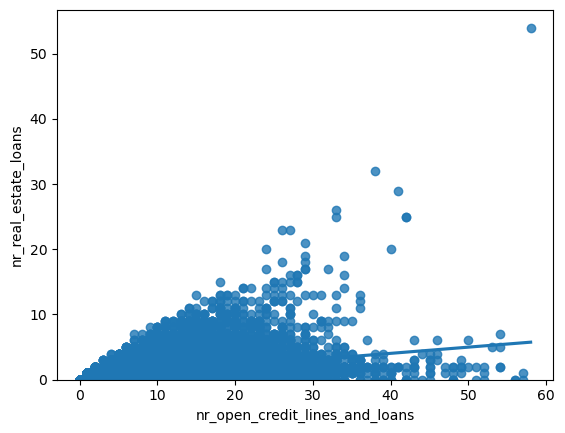

In [15]:
sns.regplot(x="nr_open_credit_lines_and_loans",y="nr_real_estate_loans",data=df)
plt.ylim(0,)

(0.0, 39.332090012556684)

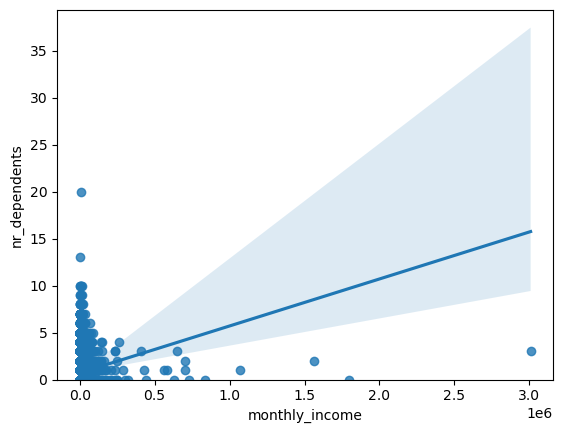

In [16]:
sns.regplot(x="monthly_income",y="nr_dependents",data=df)
plt.ylim(0,)

In [17]:
df[["nr_real_estate_loans","nr_open_credit_lines_and_loans"]].corr()

,nr_real_estate_loans,nr_open_credit_lines_and_loans
nr_real_estate_loans,1.000000,0.433959
nr_open_credit_lines_and_loans,0.433959,1.000000


In [18]:
x=df[["monthly_income","credit_balances_dividedby_limits","nr_open_credit_lines_and_loans","nr_times_30_59_days_past_due","nr_times_60_89_days_past_due","nr_times_90plus_days_past_due"]]
x.head(150)

,monthly_income,credit_balances_dividedby_limits,nr_open_credit_lines_and_loans,nr_times_30_59_days_past_due,nr_times_60_89_days_past_due,nr_times_90plus_days_past_due
0,9120.0,0.766127,13,2,0,0
1,2600.0,0.957151,4,0,0,0
2,3042.0,0.658180,2,1,0,1
3,3300.0,0.233810,5,0,0,0
4,63588.0,0.907239,7,1,0,0
...,...,...,...,...,...,...
145,5821.0,1.000000,7,0,0,0
146,12500.0,0.496912,11,0,0,0
147,3937.0,0.130902,17,1,0,0
148,3500.0,0.546999,9,0,0,0


In [19]:
y=df[["serious_delinquency"]]
y.head()

,serious_delinquency
0,1
1,0
2,0
3,0
4,0


  serious_delinquency percentage
0               0.00%     93.32%
1             100.00%      6.68%


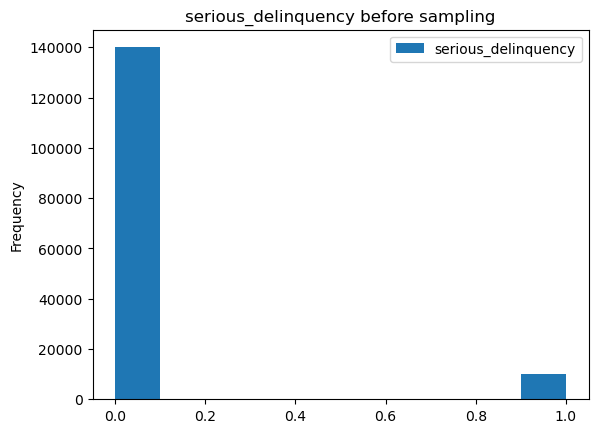

In [50]:
y.plot(kind='hist', title= 'serious_delinquency before sampling')
percentage = (y.value_counts(normalize=True).reset_index(name='percentage') )
print (percentage.map("{:.2%}".format))

In [51]:
y.value_counts()

serious_delinquency
0                      139974
1                       10026
Name: count, dtype: int64

OVER SAMPLING 

In [20]:
from imblearn.over_sampling import RandomOverSampler
# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [53]:
x_resampled,y_resampled = oversampler.fit_resample(x,y)

monthly_income  credit_balances_dividedby_limits  nr_open_credit_lines_and_loans  nr_times_30_59_days_past_due  nr_times_60_89_days_past_due  nr_times_90plus_days_past_due
6.670221e+03    1.000000                          0                               0                             0                             0                                994
                                                                                  98                            98                            98                               913
                                                  1                               0                             0                             0                                907
                                                  2                               0                             0                             0                                579
                                                  0                               0                             

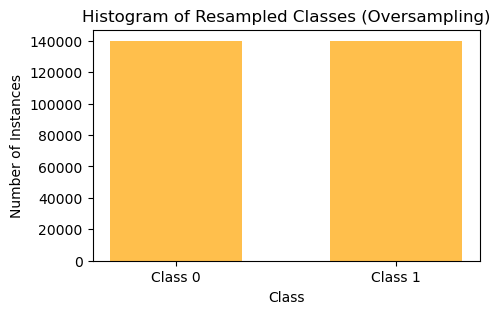

In [42]:
# Print the histogram of the resampled classes
plt.figure(figsize=(5,3))
plt.hist(y_resampled, bins=range(3), align='left', rwidth=0.6, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])
plt.show()

TRAIN AND TEST THE DATASET

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=4)
print("Train set",x_train.shape,y_train.shape)
print("Test set",x_test.shape,y_test.shape)

Train set (223958, 6) (223958, 1)
Test set (55990, 6) (55990, 1)


MODEL

In [24]:
# Calculate the ratio of negative class to positive class
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]
ratio

0.9981620599204154

In [25]:
import xgboost as xgb
# Create an XGBoost classifier with the scale_pos_weight and value
model = xgb.XGBClassifier(n_estimators=250,scale_pos_weight=ratio)
# Fit the model to the training data
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.87153745, 0.30570903, 0.15805012, ..., 0.96777946, 0.06692997,
       0.34789678], dtype=float32)

In [27]:
# Make predictions on the train set
y_pred_train = model.predict(x_train)
y_pred_proba_train = model.predict_proba(x_train)[:, 1]
y_pred_proba_train

array([0.5267418 , 0.7255836 , 0.96776396, ..., 0.06937367, 0.13564184,
       0.11885112], dtype=float32)

EVALUATION

In [28]:
#classification report for test set
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     28098
           1       0.84      0.85      0.84     27892

    accuracy                           0.84     55990
   macro avg       0.84      0.84      0.84     55990
weighted avg       0.84      0.84      0.84     55990



CONFUSION MATRIX

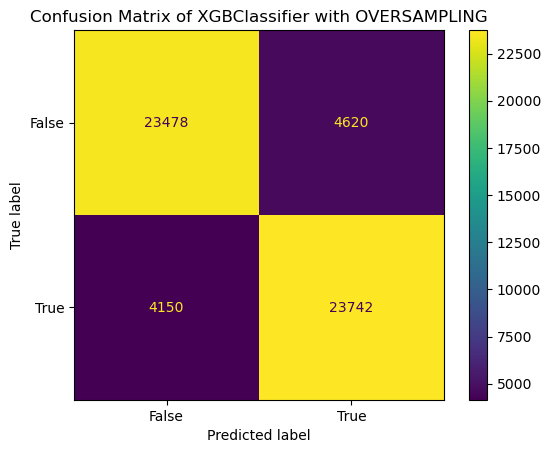

In [54]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix of XGBClassifier with OVERSAMPLING")
plt.show()